### Sampling

In [48]:
import sys
sys.path.append('../')
import pyACC

In [49]:
from pyACC.sampler import univariate_sampling


In [50]:
import scipy
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
def my_fun(x):
    return (10*np.sin(x)/x)**2

x = np.arange(-10,10,0.01)

In [52]:
norm = np.trapz(my_fun(x), x)
y_norm = my_fun(x)/norm
mu=np.trapz(y_norm*x, x)
print(mu)

var=np.trapz(y_norm*(x-mu)**2, x)
print(var)

-9.599385035607977e-05
3.141193150294456


### Rejection sampling

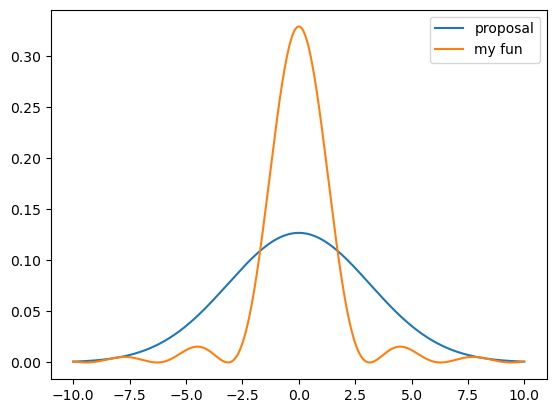

In [53]:
proposal =  scipy.stats.norm(loc=mu, scale=var)

plt.plot(x, proposal.pdf(x), label='proposal')
plt.plot(x, y_norm, label='my fun')
plt.legend()

In [54]:
N=1000

Note that rejection sampling does not require that the target function be a normalized pdf.
It automatically accounts for that rescaling the proposal function.

In [55]:
sample, scaled_proposal = univariate_sampling.rejection_sampling(my_fun, x, N, proposal)

scaling factor=  787.3803570281957
Attempted samples: 1000
Accepted samples: 392
Acceptance rate: 0.392


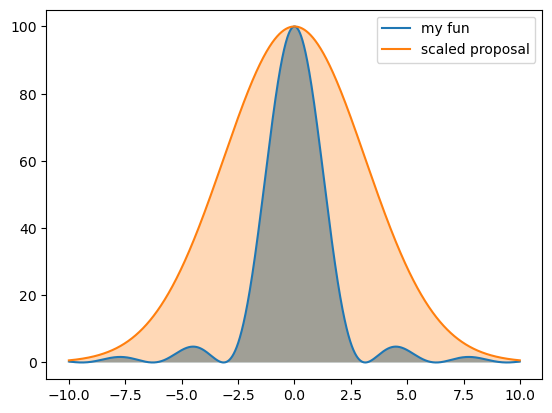

In [56]:
plt.plot(x, my_fun(x), label='my fun')
plt.fill_between(x, 0,my_fun(x), alpha=0.6)
plt.plot(x, scaled_proposal(x),label='scaled proposal')
plt.fill_between(x, 0,scaled_proposal(x), alpha=0.3)
plt.legend()

The acceptance ratio is something like the ratio of the area under the two curves: proposal/target

In [57]:
sample2, scaled_unif = univariate_sampling.rejection_sampling(my_fun, x, N )

scaling factor=  1998.9999999999577
Attempted samples: 1000
Accepted samples: 159
Acceptance rate: 0.159


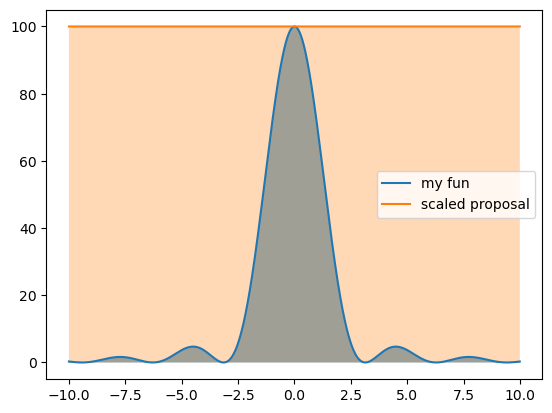

In [58]:
plt.plot(x, my_fun(x), label='my fun')
plt.fill_between(x, 0,my_fun(x), alpha=0.6)
plt.plot(x, scaled_unif(x),label='scaled proposal')
plt.fill_between(x, 0,scaled_unif(x), alpha=0.3)
plt.legend()

in the case of a uniform proposal the integral of the proposal is much bigger, thus the acceptance ratio is reduced.

/Users/edoardo/miniconda3/envs/acc-env/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/edoardo/miniconda3/envs/acc-env/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


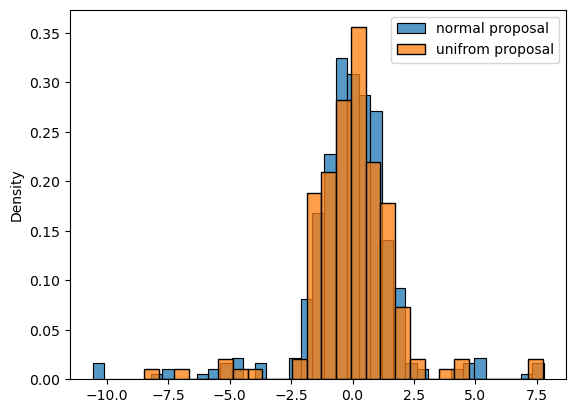

In [59]:
sns.histplot(sample, stat='density', label='normal proposal')
sns.histplot(sample2, stat='density', label='unifrom proposal')
plt.legend()


### inverse sampling

Note that inverse transform sampling requires a normalized pdf.

In [60]:
def my_fun_norm(x):
    return 1/norm * my_fun(x)

In [61]:
sample_inv, cdf, inverse_cdf = univariate_sampling.inverse_transform_sampling(my_fun_norm, x, N)

/Users/edoardo/miniconda3/envs/acc-env/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/edoardo/miniconda3/envs/acc-env/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/edoardo/miniconda3/envs/acc-env/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


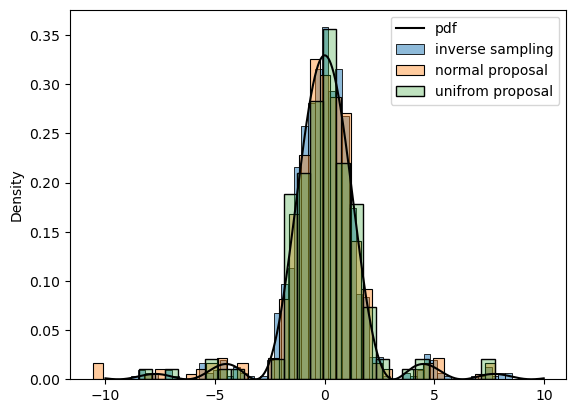

In [62]:
sns.histplot(sample_inv, stat='density', label='inverse sampling', alpha=0.5)
sns.histplot(sample, stat='density', label='normal proposal', alpha=0.4)
sns.histplot(sample2, stat='density', label='unifrom proposal', alpha=0.3)
plt.plot(x, y_norm, label='pdf', color='k')
plt.legend()

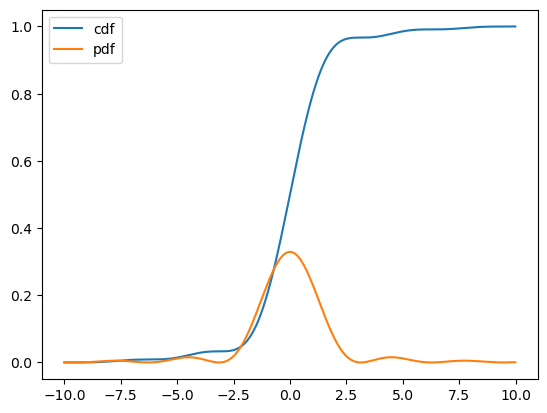

In [63]:
plt.plot(x, cdf, label='cdf')
plt.plot(x, y_norm, label='pdf')
plt.legend()


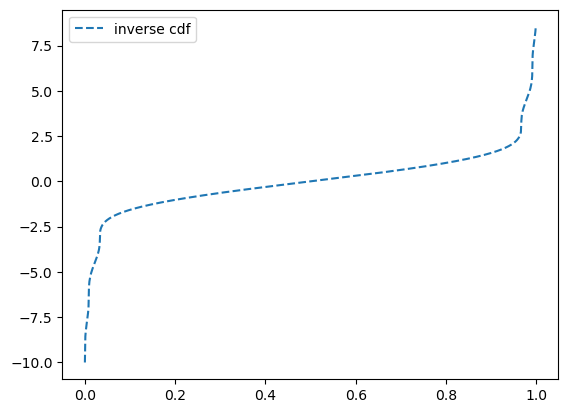

In [64]:
plt.plot(np.arange(0,1,0.001), inverse_cdf(np.arange(0,1,0.001)), label='inverse cdf', linestyle='--')
plt.legend()